Recall! You must copy this notebook to your own Drive before using!

# **Lab Nine: Linear Regression 3—Categorical Variables, Mean and Median Absolute Error, Log-Log Coefficients**


## **Connect To Your Google Drive**

Here we want to ensure you're able to connect to google drive. If you are unable to connect, try using a different browser like Safari or Edge.

In [1]:
from os import environ
from google.colab import drive

# if we are starting here we need to remount our drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### So Mounting Your Drive Programmatically Has Failed...

If you, like me, and have had trouble like above connecting to Google Drive, fear not! Alternative routes exist. Follow these instructions:



1.   Go to `View` located at the top ribbon within the notebook (between `Edit` and `Insert`).
2.   Select `Table of Contents`
3.   Click on the `file` icon as seen below:

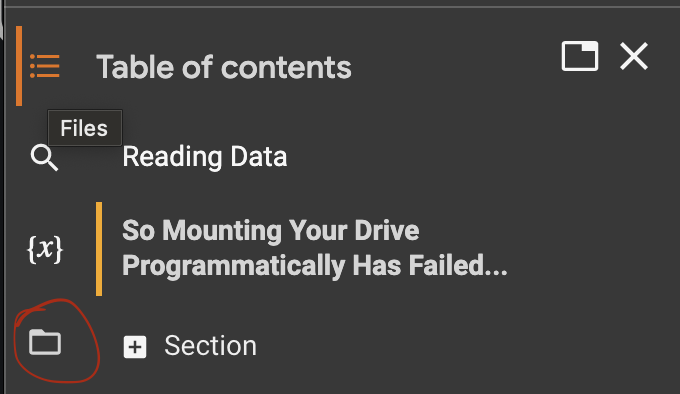

4.   Mount Drive!

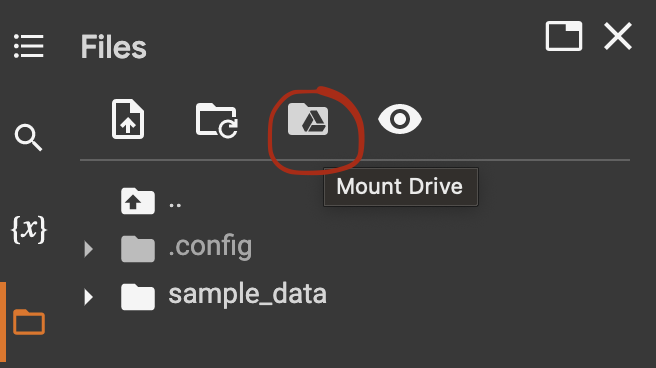

# Pre-requisite
Read In the market for used cars dataset to a pandas DataFrame. The data is available in the Canvas Module for today's lesson. Run the following cell (this one is a freebie).

In [2]:
from pandas import read_csv

file_path = "/content/drive/MyDrive/Work/Chapman/MGSC_310/MGSC_310_shared_files_and_resources/Data/used_cars.csv"

used_cars = read_csv(file_path)

used_cars = used_cars.dropna().reset_index(drop=True)

used_cars['max_power (bhp)'] = used_cars['max_power (bhp)'].astype(float)

used_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage (kmpl),engine (CC),max_power (bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0,88.20


In [5]:
used_cars['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

# Question 1

Create a dataset for predicting the selling_price of cars.

The variable X should contain the following columns:
- `year`
- the **log** of `km_driven` (call it `log_km_driven`)
- `seats`
- `milage (kmpl)`
- the squared polynomial of `milage (kmpl)` (call it `squared_milage`)
- `engine (CC)`
- `max_power (bhp)`

The variable y should contain the target column:
- **log** of `selling_price` (call it `log_selling_price`)

In [12]:
from numpy import log
used_cars['squared_mileage'] = used_cars['mileage (kmpl)']**2
used_cars['log_km_driven'] = log(used_cars['km_driven'])
used_cars['log_selling_price'] = log(used_cars['selling_price'])

In [13]:
X = used_cars[['year', 'log_km_driven', 'seats', 'mileage (kmpl)', 'squared_mileage', 'engine (CC)', 'max_power (bhp)']]
y = used_cars['log_selling_price']

# Question 2

Create a train test split where the training set is 85% of the data and test is 15% of the data. If you need to find the code, check the slides from today's class. **Hint: from sklearn.model_selection import train_test_split**

See also [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=435)

# Question 3

Estimate a regression model of using X_train and y_train from above using scikit-learn. Assign the model to a variable `reg`.

In [16]:
from sklearn.linear_model import LinearRegression

# Fitting a linear regression model using scikit-learn
reg = LinearRegression()
reg.fit(X_train, y_train) # find the best fitting line!

LinearRegression()

# Question 4

Make in-sample and out of sample predictions using X_train and X_test, respectively. Assign each to variables `in_sample` and `out_of_sample` variables, respectively.

In [17]:
in_sample = reg.predict(X_train) # get the results!
out_of_sample = reg.predict(X_test)

print(in_sample)
print(out_of_sample)

[12.23851121 12.59781139 13.66970615 ... 12.80404506 12.2170084
 13.30602627]
[11.23804607 12.26208373 12.20234616 ... 11.67421658 12.44369079
 12.49373867]


# Question 5

As a data scientist, analyst, or anyone working with code, you'll need to become comfortable *inheriting code*. This problem is a synthetic version of that. It also tests your understanding of the terms "in sample" and "out of sample".

Using `in_sample` and `out_of_sample` from the previous question, amend the below code to create the Observed Versus Predicted Plot (or True-Prediction Plot) as I demonstrated to you in class. (A successful answer involves switching out just two variables below).

After you sucessfully plot the data, write a 1-2 sentence answer to the question: Is the data underfitting, overfitting, or well-fitting of the data?

In [20]:
import altair as alt
from pandas import DataFrame, concat

alt.data_transformers.enable('default', max_rows=None)

# Convert the predictions and true values into a dataframe for visualization with Altair
train_data = DataFrame({
    'True Values': y_train,
    'Predicted Values': in_sample,
    'Dataset': 'Training'
})

test_data = DataFrame({
    'True Values': y_test,
    'Predicted Values': out_of_sample,
    'Dataset': 'Test'
})

all_data = concat([train_data, test_data])

# Define the perfect prediction line
perfect_line_calc = [min(y) - 1, max(y) + 1]

perfect_prediction = DataFrame({
    'True Values': perfect_line_calc,
    'Predicted Values': perfect_line_calc
})

# Create the Altair plots

# Training data plot
train_chart = alt.Chart(train_data).mark_circle(color='blue').encode(
    x='True Values',
    y='Predicted Values',
    tooltip=['True Values', 'Predicted Values']
).properties(
     width=300,
    height=0,
    title='Predicted Versus True Values (Training Data)'
)

# Test data plot
test_chart = alt.Chart(test_data).mark_circle(color='red').encode(
    x='True Values',
    y='Predicted Values',
    tooltip=['True Values', 'Predicted Values']
).properties(
    width=300,
    height=300,
    title='Predicted Versus True Values (Test Data)'
)

# Perfect prediction line
line_chart = (alt.Chart(perfect_prediction)
                 .mark_line(color='black', strokeDash=[5,5])
                 .encode(
                        x='True Values',
                        y='Predicted Values'
                    )
        )
# Alternative Facet Chart by creating multiple charts
(train_chart + line_chart) | (test_chart + line_chart)


alt.HConcatChart(...)

The data is well-fitting. The test data is clustered around the diagonal tightly and there are very few outliers.

# Question 6

Take X and y from above and using statsmodels.api, run an OLS predicting y from X (add to constant) for the log-log regression.

1. Print a summary of the results.

2. In your own words, interpret the effect of the `log_km_driven` coefficient on the dependent variable. Be sure to explain this relationship using the standard language of log-log linear regression as demonstrated in class.

3. In your own words, explain both the coefficient of `mileage (kmpl)` and the coefficient of `squared mileage` on each other and on the dependent variable. Be sure to explain this relationship using the standard language of log-log linear regression as demonstrated in class.

In [21]:
import statsmodels.api as sm

X_with_const = sm.add_constant(X)

model = sm.OLS(y, X_with_const).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      log_selling_price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     6951.
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:07:08   Log-Likelihood:                -1939.8
No. Observations:                7906   AIC:                             3896.
Df Residuals:                    7898   BIC:                             3951.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -210.7584      2.593    -

2. In your own words, interpret the effect of the `log_km_driven` coefficient on the dependent variable. Be sure to explain this relationship using the standard language of log-log linear regression as demonstrated in class.

- Here we demonstrate that a 1% increase in the `log_km_driven` *decreases* the value of the log selling price (dependent variable) by a marginal amount (apprx. -0.0642%), holding all else equal.

3. In your own words, explain both the coefficient of mileage (kmpl) and the coefficient of squared mileage on each other and on the dependent variable. Be sure to explain this relationship using the standard language of log-log linear regression as demonstrated in class.

- Here we demonstrate that for every one-unit increase in the mileage of a car, the selling price is expected to increase by approximately 2.89%, holding all else equal. However, as mileage increases, this positive effect diminishes. Specifically, for every additional unit increase in mileage, the price increase of the log selling price diminishes at a rate of approximately 0.02%, holding all else constant, Although this is not statistically significant.